# Week 47

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## The fluorescent protein “mCherry”.

The spectra of many fluorescent proteins can be found at the website:
[www.fpbase.org](https://www.fpbase.org/). Go to FPbase and search for
“mCherry”.

#### (a) Find parameters.

Find the following parameters for the protein

-   Extinction coefficient at absorbance maximum
-   Quantum yield
-   The organism from which it was originally isolated
-   Molecular weight

Save them to seperate variables in the cell below.

In [2]:
QY = 0.22
EC = 72000 # [1/(M cm)]
organism = "Discosoma sp."
m_w = 26.7 * 10**3 # From fpbase

#### (b) Adorbance

What is the absorbance of a 1 µM solution of mCherry at its absorption
maximum?

In [5]:
c = 1 * 10**(-6) # [M]
l = 1 # [cm]
A_max = EC * c * l
print(f"{A_max = :3.3f}")

A_max = 0.072

#### (c) Extinction coefficient from sequence.

The sequence of the protein is also given. From this determine the
extinction coefficient at 280 nm.

Start by taking the sequence from the website and assigning it to the
variable `sequence` in the cell below.

In [7]:
sequence="""MVSKGEEDNM AIIKEFMRFK VHMEGSVNGH EFEIEGEGEG RPYEGTQTAK LKVTKGGPLP FAWDILSPQF MYGSKAYVKH PADIPDYLKL SFPEGFKWER VMNFEDGGVV TVTQDSSLQD GEFIYKVKLR GTNFPSDGPV MQKKTMGWEA SSERMYPEDG ALKGEIKQRL KLKDGGHYDA EVKTTYKAKK PVQLPGAYNV NIKLDITSHN EDYTIVEQYE RAEGRHSTGG MDELYK"""

Now use the sequence to calculate the extinction coefficient

In [9]:
# This is 'dictionary' with the extinction coefficients of the relevant 
# amino acid residues. Dictionaries are indexed with 'keys', so you can retrieve
# the value for W as: ext_residue["W"].
ext_residue = {"W": 5500, "Y": 1490, "C": 125}

# Count the number of active residues
N_trp = sequence.count("W")
N_tyr = sequence.count("Y")
N_cys = sequence.count("C")

# Calculate the extinction coefficient: 
ext_coeff = N_trp * ext_residue["W"] + N_tyr * ext_residue["Y"] + N_cys * ext_residue["C"]

print(f"{ext_coeff = :3.3f}")

ext_coeff = 34380.000

#### (d) What is the concentration of a 1 µM solution of mCherry in mg/mL?

In [11]:
conc_molar = 1 * 10**(-6) # From 1 [uM].
conc_mg_mL = conc_molar * m_w 
print(f"{conc_mg_mL = }")

conc_mg_mL = 0.026699999999999998

------------------------------------------------------------------------

The excitation and emission spectra can be downloaded as a csv-file by
clicking the download icon as highlighted below

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_47/download_spectra.png"
alt="Download spectra" />
<figcaption aria-hidden="true">Download spectra</figcaption>
</figure>

------------------------------------------------------------------------

#### (e) Load the dataset

Use the widget below to load the dataset as a `DataFrame`

In [12]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [13]:
df = uploader.get_dataframe()
display(df)

In [14]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('mCherry') # Load from package for the solution so it doesn't require to interact.
display(df)

1100 rows × 4 columns

#### (f) Plot spectra

Make your own plot showing the excitation and emission spectra of
“mCherry” using the above data.

> **Tip**
>
> You don’t have to worry about the `NaN` values in the dataset when
> plotting, matplotlib just skips plotting that line segment.

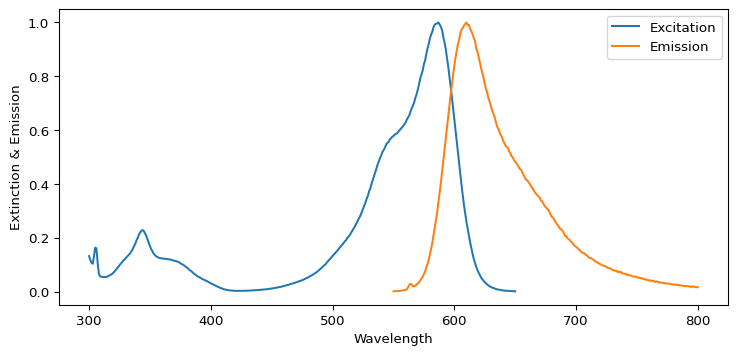

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(df['wavelength'], df['mCherry ex'], label='Excitation')
ax.plot(df['wavelength'], df['mCherry em'], label='Emission')
ax.legend()
ax.set_xlabel('Wavelength')
ax.set_ylabel('Extinction & Emission')
plt.show()

#### (g) Stokes shift

What is the Stokes shift of mCherry?

> **Tip**
>
> If you have two arrays `A` and `B` you can find the entry in `A`
> corresponding to the largest value in `B` like this
>
> ``` python
> A_at_B_max = A[np.argmax(B)]
> ```

In [18]:
import numpy as np
lambda_ex = df['wavelength'][np.argmax(df['mCherry ex'])]
lambda_em = df['wavelength'][np.argmax(df['mCherry em'])]
stokes_shift = lambda_em - lambda_ex

print(f"{lambda_ex = :d}")
print(f"{lambda_em = :d}")
print(f"{stokes_shift = :d}")

lambda_ex = 587
lambda_em = 610
stokes_shift = 23

#### (h) Colors

What colors are the light that correspond to the excitation and emission
maxima respectively?

------------------------------------------------------------------------

## Proteins in blood plasma.

In this exercise we will learn how Python is excellent for handling
datasets with many data points and how it can be used to apply the same
procedure to all the data points at once.

A researcher wants to determine the concentration of two proteins in
blood plasma that is suspected to be involved in development of an
autoimmune disease. 500 patients and 500 healthy individuals were
included in the study and absorbance measurements of the two purified
proteins from all blood plasma samples were measured at 280 nm. The
molecular weight and extinction coefficients of the two proteins are
given in the table below.

| Protein | $M_w$ $[\text{kDa}]$ | $\epsilon$ $[\text{M}^{-1}\text{cm}^{-1}]$ |
|-----------------------|---------------------|-----------------------------|
| 1       | 130                  | 180000                                     |
| 2       | 57                   | 80000                                      |

Properties of the two proteins.

#### (a) Load the dataset

Use the widget to load the dataset as a dataframe from the file
**protein_blood_plasma.xlsx**

In [19]:
from IPython.display import display 
from fysisk_biokemi.widgets import DataUploader
uploader = DataUploader()
uploader.display()

Run this cell **after** having uploaded the file in the cell above.

In [20]:
df = uploader.get_dataframe()
display(df)

In [21]:
from fysisk_biokemi.datasets import load_dataset
from IPython.display import display 
df = load_dataset('protein_blood_plasma') # Load from package for the solution so it doesn't require to interact.
display(df)

500 rows × 4 columns

#### (b) Calculate concentrations

Calculate the molar concentration of the two proteins in all samples,
the light path for every measurement is 0.1 cm.

Always a good idea to assign known values to variables

In [22]:
protein_1_ext_coeff = 180000
protein_2_ext_coeff = 80000
l = 0.1

> **Tip**
>
> You can set new columns in a `DataFrame` by just assigning to it
>
> ``` python
> df['new_column'] = [1, 2, 3, ..., 42]
> ```
>
> It can also be set as a computation of a property from another row
>
> ``` python
> df['new_column'] = df['current_column'] / 4
> ```

In [24]:
df['protein1_healthy_molar_conc'] = df['A280_protein1_healthy'] / (protein_1_ext_coeff * l)
df['protein1_patient_molar_conc'] = df['A280_protein1_patient'] / (protein_1_ext_coeff * l)
df['protein2_healthy_molar_conc'] = df['A280_protein2_healthy'] / (protein_2_ext_coeff * l)
df['protein2_patient_molar_conc'] = df['A280_protein2_patient'] / (protein_2_ext_coeff * l)
display(df)

500 rows × 8 columns

#### (c). Concentrations in mg/mL

Add another set of four columns containing the concentrations in mg/mL.

In [25]:
protein_1_mw = 130 * 10**3
protein_2_mw = 57 * 10**3

In [27]:
df['protein1_healthy_conc'] = df['protein1_healthy_molar_conc'] * protein_1_mw
df['protein1_patient_conc'] = df['protein1_patient_molar_conc'] * protein_1_mw
df['protein2_healthy_conc'] = df['protein2_healthy_molar_conc'] * protein_2_mw
df['protein2_patient_conc'] = df['protein2_patient_molar_conc'] * protein_2_mw

names = ['protein1_healthy_conc', 'protein1_patient_conc', 'protein2_healthy_conc', 'protein2_patient_conc']
display(df[names])

500 rows × 4 columns

#### (d) Mean concentration

Now that we have the concentrations, calculate the concentration in the
four categories.

> **Tip**
>
> When displaying the dataframe above we used indexed it with `names` as
> `df[names]`. We can do the same to compute something over just the
> four rows.
>
> For example the if we have a `DataFrame` called `example_df`, we can
> calculate the mean over the **rows** as:
>
> ``` python
> df[names].mean(axis=0)
> ```
>
> Here `axis=0` means that we apply the operation over the first axis
> which by convention are the rows.

In [29]:
mean = df[names].mean(axis=0)
display(mean)

protein1_healthy_conc    0.677316
protein1_patient_conc    0.104155
protein2_healthy_conc    0.242293
protein2_patient_conc    0.256983
dtype: float64

#### (e) Standard deviation

Calculate the standard deviation

> **Tip**
>
> The standard deviation can be calculated using the `.std`-method that
> works in the same way as the `.mean`-method we used above.

In [31]:
std = df[names].std(axis=0)
display(std)

protein1_healthy_conc    0.107141
protein1_patient_conc    0.005458
protein2_healthy_conc    0.040127
protein2_patient_conc    0.052373
dtype: float64

#### (f) Analyze the results

Consider the following questions

-   By comparing healthy individuals with patients, would you expect
    that any of the two proteins would be involved in disease
    development?
-   What additional information does the standard deviation provide
    besides the average value of the protein concentration?

------------------------------------------------------------------------

## Dialysis experiment

A dialysis experiment was set up where equal amounts of a protein were
separately dialyzing against buffers containing different concentrations
of a ligand – each measurement was done in triplicate. The average
number of ligands bound per protein molecule, $\bar{n}$ were obtained
from these experiments. The corresponding concentrations of free ligand
and values are given in dataset `dialysis_experiment.xlsx`.

#### (a) Load the dataset

In [32]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [33]:
df = uploader.get_dataframe()
display(df)

In [34]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('dialysis_experiment') # Load from package for the solution so it doesn't require to interact.
display(df)

#### (b) Explain calculation of $\bar{n}$

Explain how the values of $\bar{n}$ is calculated when knowing the
concentrations of ligand inside and outside the dialysis bag, as well as
the total concentration of the protein, \[$\text{P}_{\text{tot}}$\].

#### (c) Molar concentrations

Convert the concentrations of free ligand to SI-units given in M, add it
as a row to the `DataFrame`.

In [35]:
df['Free Ligand [L](M)'] = df['Free ligand [L](µM)'] * 10**(-6)
display(df)

#### (c) Plot the data

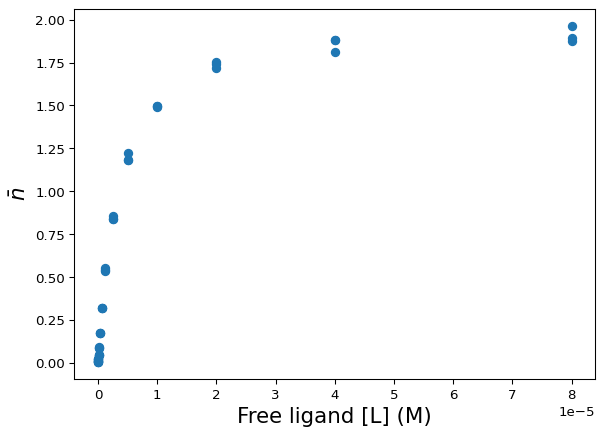

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['Free Ligand [L](M)'], df['n-bar'], 'o')
ax.set_xlabel('Free ligand [L] (M)', fontsize=16)
ax.set_ylabel(r'$\bar{n}$', fontsize=16)
plt.show()

#### (d) Prepare for fitting

Now we want to fit the data to extract $K_D$ and $\nu_{\text{max}}$, by
using the equation

$$
\nu([L_{\text{free}}]) = \nu_{\text{max}} \frac{[L_{\text{free}}]}{K_D + [L_{\text{free}}]}
$$

To do so we need to implmenet it as a Python function

In [39]:
def nu(L, nu_max, K_D):
    return nu_max * L / (K_D + L)

print(f"{nu(1, 1, 1) = }") # Should give 1/2
print(f"{nu(21, 47, 2.5) = }") # Should give 42

nu(1, 1, 1) = 0.5
nu(21, 47, 2.5) = 42.0

#### (e) Actually fitting

> **Important**
>
> Fitting refers to finding the parameters that make an assumed
> functional form best ‘fit’ the data. Programmatically we will use the
> `curve_fit` from the `scipy` package to do so. The signature of this
> function looks like this
>
> ``` python
> curve_fit(function, 
>             x_data, 
>             y_data, 
>             p0=[param_1, param_2, ...])
> ```
>
> The arguments are
>
> -   `function`: A python function where the **first** argument is the
>     independent variable, and other arguments are the parameters of
>     the functions.
> -   `x_data`: The observed values of the independent variable.
> -   `y_data`: The observed values of the dependent variable.
> -   `p0`: Initial guesses for the parameters.
>
> When called `curve_fit` starts by calculating how well the functions
> fits the data with the initial parameters in `p0` and then iteratively
> improves the fit by trying new values for the parameters in an
> intelligent way.
>
> The found parameters will generally depend on `p0` and it is therefore
> necessary to provide a good (or good enough) guess for `p0`.

Finish the code to perform the fitting in the cell below.

In [41]:
from scipy.optimize import curve_fit

# Choose the variables from the dataframe
x = df['Free Ligand [L](M)']
y = df['n-bar']

# Initial guess
K_D_guess = 10**(-5)
nu_max_guess = 1
p0 = [K_D_guess, nu_max_guess]

# Curve fit
popt, pcov = curve_fit(nu, x, y, p0=p0)
nu_max_fit, K_D_fit = popt
print(f"{nu_max_fit = :1.3f} ")
print(f"{K_D_fit = :e}")

nu_max_fit = 2.009 
K_D_fit = 3.395997e-06

Are the parameters you find reasonable? How can you tell if they are
reasonable by looking at the plot you made earlier?

#### (f) Plot with fit

When we have the fitted parameters we can calculate and plot the
function. To do so we make an array of values for the independent
variable and use our function to calculate the dependent variable

In [43]:
# This makes 50 equally spaced points between 0 and the highest concentration x 1.2
L = np.linspace(0, x.max()*1.2, 50) 

# Calculate: 
nu_calc = nu(L, nu_max_fit, K_D_fit)

Now that we calculated the dependent variable we can plot the fit along
with the data.

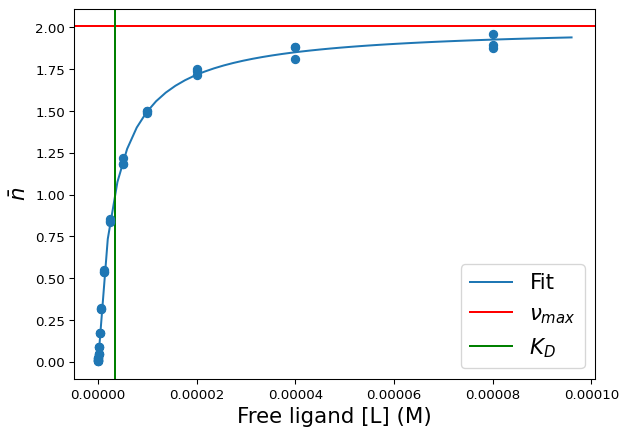

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the fitted curve
ax.plot(L, nu_calc, label='Fit')

# Straight lines indicating the parameters 
ax.axhline(nu_max_fit, color='red', label=r'$\nu_{max}$')
ax.axvline(K_D_fit, color='green', label=r'$K_D$')

# Same as before
ax.plot(df['Free Ligand [L](M)'], df['n-bar'], 'o', color='C0')
ax.set_xlabel('Free ligand [L] (M)', fontsize=16)
ax.set_ylabel(r'$\bar{n}$', fontsize=16)
ax.legend(fontsize=16)
plt.show()